<a href="https://colab.research.google.com/github/Mirayulia2707/Dataset4/blob/main/Salinan_dari_SC60307_Mira_Yulia_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Data Preparation

# Missing Value

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

data = pd.read_csv("https://raw.githubusercontent.com/Mirayulia2707/Health-Case-Study/main/heart.csv", sep = ",")

In [ ]:
data.shape

(1025, 14)

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#check missing value
data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='index'>

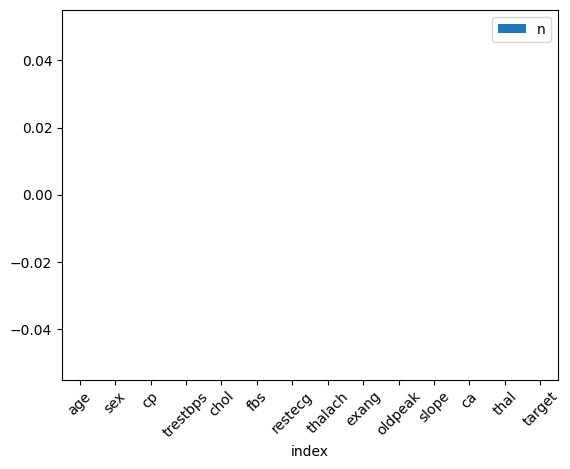

In [ ]:
import matplotlib
data.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [ ]:
data = data.fillna(data.mean())

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")


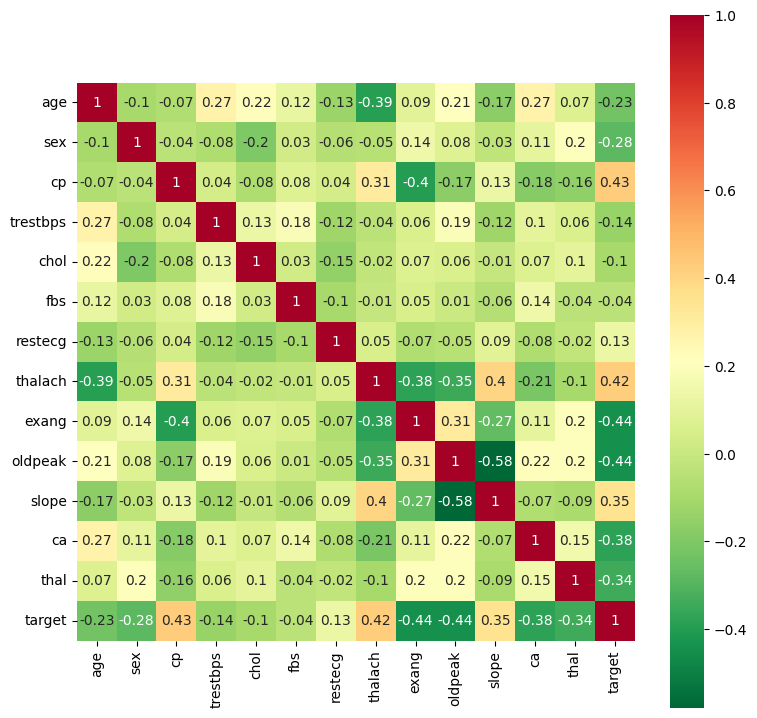

In [ ]:
# Correlation Heatmap
correlation = data.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [ ]:
data.isnull().values.any() #Jika True artinya ada data yg hilang

False

In [ ]:
df = pd.DataFrame(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##Duplicate Value

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


##Melakukan Standarization dan Normalization

In [ ]:
#Menghitung nilai z-score dengan standard scaler
from sklearn.preprocessing import StandardScaler
import numpy as np

nilai = pd.read_csv("https://raw.githubusercontent.com/Mirayulia2707/Health-Case-Study/main/heart.csv")
nilai.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
 nilai['Total'] = 1.5 + (0.028 * nilai['thalach']) + (0.0014 * nilai['age'])
 nilai.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Total
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,6.2768
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,5.9142
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,5.0980
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,6.0934
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,4.5548


In [ ]:
#ini bisa dilewat, karena ini hanya untuk pembuktian saja
nilai['rerata_na'] = nilai['Total'].mean()
nilai['std_na'] = nilai['Total'].std()

nilai.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Total,rerata_na,std_na
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,6.2768,5.751404,0.639311
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,5.9142,5.751404,0.639311
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,5.0980,5.751404,0.639311
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,6.0934,5.751404,0.639311
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,4.5548,5.751404,0.639311


In [ ]:
#mulai memanggil standarscaler dan memasukkan data ke dalam fungsi scaler

scaler = StandardScaler()
y = np.array(nilai['Total']).reshape(-1,1)

scaler.fit(y)

StandardScaler()

In [ ]:
nilai['standar_na'] = scaler.transform(y)

nilai.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Total,rerata_na,std_na,standar_na
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,6.2768,5.751404,0.639311,0.822217
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,5.9142,5.751404,0.639311,0.254767
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,5.0980,5.751404,0.639311,-1.022543
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,6.0934,5.751404,0.639311,0.535206
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,4.5548,5.751404,0.639311,-1.872623


In [ ]:
#bandingkan dengan hitung sendiri

nilai['standar2'] = (nilai['Total']-nilai['rerata_na'])/nilai['std_na']
nilai.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Total,rerata_na,std_na,standar_na,standar2
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,6.2768,5.751404,0.639311,0.822217,0.821816
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,5.9142,5.751404,0.639311,0.254767,0.254643
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,5.0980,5.751404,0.639311,-1.022543,-1.022044
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,6.0934,5.751404,0.639311,0.535206,0.534945
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,4.5548,5.751404,0.639311,-1.872623,-1.871709
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,4.9972,5.751404,0.639311,-1.180290,-1.179714
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,5.5012,5.751404,0.639311,-0.391556,-0.391365
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,5.6370,5.751404,0.639311,-0.179036,-0.178949
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,5.5964,5.751404,0.639311,-0.242573,-0.242455
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,4.8236,5.751404,0.639311,-1.451965,-1.451256


In [ ]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(y)

nilai['minmax'] = scaler.transform(y)
nilai.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Total,rerata_na,std_na,standar_na,standar2,minmax
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,6.2768,5.751404,0.639311,0.822217,0.821816,0.745546
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,5.9142,5.751404,0.639311,0.254767,0.254643,0.645236
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,5.0980,5.751404,0.639311,-1.022543,-1.022044,0.419442
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,6.0934,5.751404,0.639311,0.535206,0.534945,0.694810
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,4.5548,5.751404,0.639311,-1.872623,-1.871709,0.269171


In [ ]:
nilai['min_na'] = nilai['Total'].min()
nilai['max_na'] = nilai['Total'].max()

nilai.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,Total,rerata_na,std_na,standar_na,standar2,minmax,min_na,max_na
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,6.2768,5.751404,0.639311,0.822217,0.821816,0.745546,3.5818,7.1966
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,5.9142,5.751404,0.639311,0.254767,0.254643,0.645236,3.5818,7.1966
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,5.0980,5.751404,0.639311,-1.022543,-1.022044,0.419442,3.5818,7.1966
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,6.0934,5.751404,0.639311,0.535206,0.534945,0.694810,3.5818,7.1966
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,4.5548,5.751404,0.639311,-1.872623,-1.871709,0.269171,3.5818,7.1966


In [ ]:
nilai['minmax2'] = (nilai['Total']-nilai['min_na']) / (nilai['max_na']-nilai['min_na'])
nilai[['age','Total','min_na','max_na','minmax','minmax2']].head()

,age,Total,min_na,max_na,minmax,minmax2
0,52,6.2768,3.5818,7.1966,0.745546,0.745546
1,53,5.9142,3.5818,7.1966,0.645236,0.645236
2,70,5.0980,3.5818,7.1966,0.419442,0.419442
3,61,6.0934,3.5818,7.1966,0.694810,0.694810
4,62,4.5548,3.5818,7.1966,0.269171,0.269171


## Features Encoder

##### 1. One Hot Encoder
##### 2. Label Encoder

In [ ]:
#One Hot Encoder
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data['cp'].unique()

array([0, 1, 2, 3])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Tentukan urutan "kategori" untuk memudahkan
enc = OneHotEncoder(categories=[['0', '1',
       '2', '3',]] ,handle_unknown='ignore', sparse = False)

In [ ]:
#ubah dulu sebagai array
y = np.array(data['cp']).reshape(-1,1)
enc.fit(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(categories=[['0', '1', '2', '3']], handle_unknown='ignore',
              sparse=False, sparse_output=False)

In [ ]:
y1 =  enc.transform(y)
y1

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
data[['cp_0',
      'cp_1',
      'cp_2',
      'cp_3',]] = y1

In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,0.0,1.0,0.0,0.0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,1.0,0.0,0.0,0.0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,1.0,0.0,0.0,0.0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1.0,0.0,0.0,0.0
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,1.0,0.0,0.0,0.0


In [ ]:
#Label encoder
from sklearn.preprocessing import OrdinalEncoder

data['fbs'].unique()

array([0, 1])

In [ ]:
enc = OrdinalEncoder(categories=[['0','1']], unknown_value=99, handle_unknown='use_encoded_value')

In [ ]:
#ubah dulu sebagai array
y = np.array(data['fbs']).reshape(-1,1)
enc.fit(y)

OrdinalEncoder(categories=[['0', '1']], handle_unknown='use_encoded_value',
               unknown_value=99)

In [ ]:
data['fbs'].fillna("unknown", inplace=True)

In [ ]:
#ubah dulu sebagai array
y = np.array(data['fbs']).reshape(-1,1)
enc.fit(y)

OrdinalEncoder(categories=[['0', '1']], handle_unknown='use_encoded_value',
               unknown_value=99)

In [ ]:
data['fbs_ordinal'] = enc.transform(y)

In [ ]:
data[['fbs','fbs_ordinal']].head()

,fbs,fbs_ordinal
0,0,0.0
1,1,1.0
2,0,0.0
3,0,0.0
4,1,1.0


##2.Exploratory Data Analysis (EDA)

##Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
df = pd.DataFrame(data)

# Examine the data types of each column
print("Data types of each column:")
print(df.dtypes)

# Determine the nominal, ordinal, and numerical variables
nominal_vars = [col for col in df.columns if df[col].dtype == 'object']
ordinal_vars = [col for col in df.columns if col.endswith('_ordinal')]
numerical_vars = [col for col in df.columns if df[col].dtype not in ['object', 'bool']]

print("\nNominal variables:")
print(nominal_vars)

print("\nOrdinal variables:")
print(ordinal_vars)

print("\nNumerical variables:")
print(numerical_vars)

Data types of each column:
age              int64
sex              int64
cp               int64
trestbps         int64
chol             int64
fbs              int64
restecg          int64
thalach          int64
exang            int64
oldpeak        float64
slope            int64
ca               int64
thal             int64
target           int64
cp_0           float64
cp_1           float64
cp_2           float64
cp_3           float64
fbs_ordinal    float64
dtype: object

Nominal variables:
[]

Ordinal variables:
['fbs_ordinal']

Numerical variables:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_ordinal']


##Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

In [ ]:
df[['age','trestbps','chol']].\
    groupby(['age','trestbps']).\
    agg(min_chol = ('chol','min'), median_chol = ('chol','median'), max_chol = ('chol','max'), average_chol = ('chol','mean')).\
    sort_values(by='age', ascending = True)


min_chol  median_chol  max_chol  average_chol
age trestbps                                               
29  130            204        204.0       204         204.0
34  118            182        196.0       210         196.0
35  120            198        198.0       198         198.0
    122            192        192.0       192         192.0
    126            282        282.0       282         282.0
...                ...          ...       ...           ...
71  112            149        149.0       149         149.0
    160            302        302.0       302         302.0
74  120            269        269.0       269         269.0
76  140            197        197.0       197         197.0
77  125            304        304.0       304         304.0

[242 rows x 4 columns]

In [ ]:
#code here
df.groupby(['sex'])['fbs'].value_counts(normalize=True)

sex  fbs
0    0      0.865385
     1      0.134615
1    0      0.844320
     1      0.155680
Name: fbs, dtype: float64

##Menemukan dan mendeskripsikan statistical five summaries

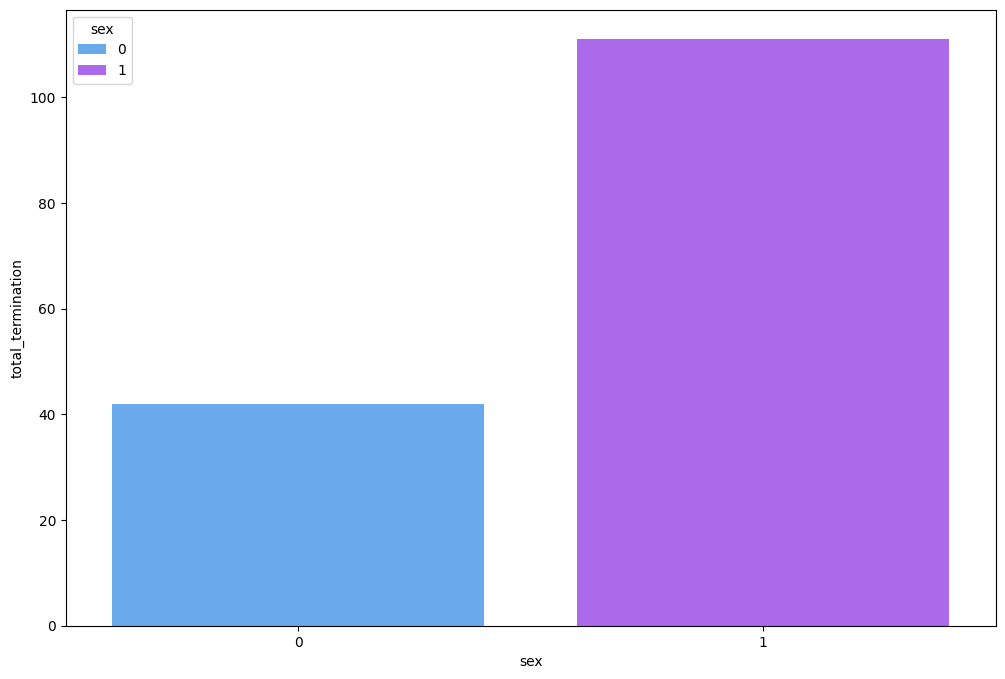

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



#Step1, get the data
term = df.groupby(by=['sex'])\
                        .agg(total_termination=('fbs','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='sex', y='total_termination', hue='sex', data=term, palette='cool')

[Text(0.5, 1.0, 'Scatter Plot')]

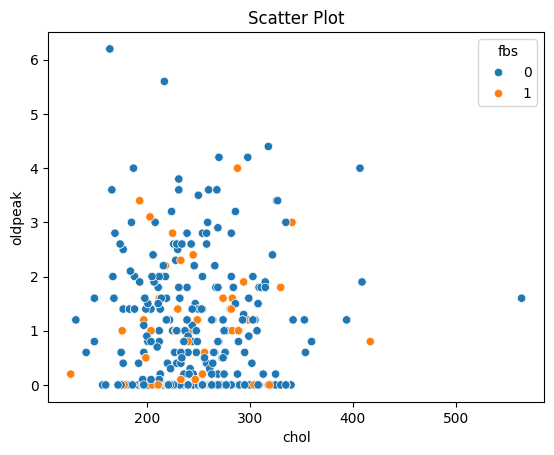

In [ ]:
#code here
df_scatter = df[['chol', 'oldpeak','fbs']]
sns.scatterplot(data=df_scatter, x='chol', y='oldpeak', hue='fbs').set(title='Scatter Plot')

In [ ]:
df_termd= df.groupby(by=['restecg'])\
          .agg(total_fbs=('fbs','sum'))\
          .sort_values(by='total_fbs', ascending=False)\
          .reset_index()
sns.barplot(data=df_termd, x='total_fbs', y='restecg', hue='restecg', dodge=False).set(title="Termination of an Ilness")

NameError: name 'df' is not defined

Text(0, 0.5, '')

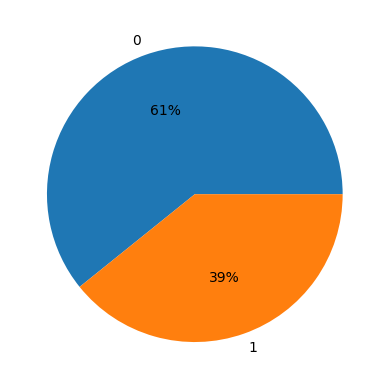

In [ ]:
#piechart
df_employee = df[df['fbs']==1]\
                .groupby(['exang'])\
                .agg(total_fbs = ('fbs', 'count'))\
                .sort_values(by='total_fbs', ascending=False)\
                .plot(kind='pie', y='total_fbs', autopct='%1.0f%%', legend=False)
df_employee.set_ylabel(None)

<Axes: xlabel='chol', ylabel='trestbps'>

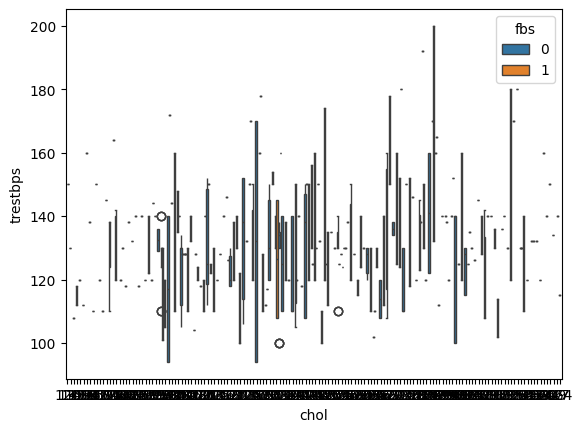

In [ ]:
#code here
#boxplot
df_box = df[['chol', 'trestbps', 'fbs']]
sns.boxplot(data=df_box, x='chol', y='trestbps', hue='fbs')

Pairplot


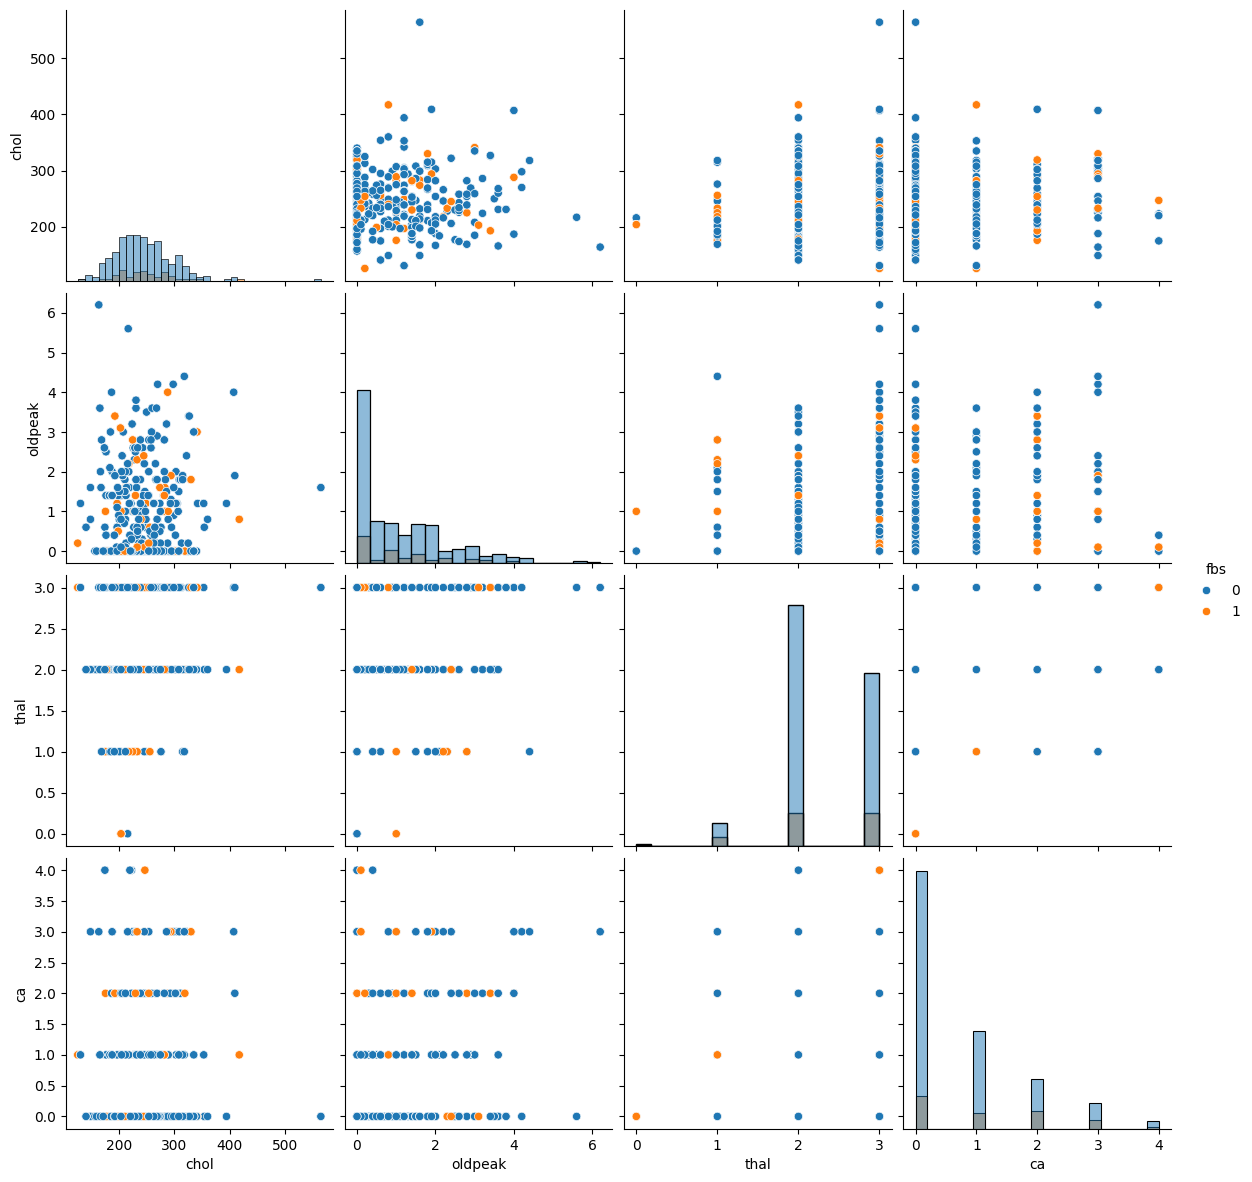

In [ ]:
#codde here
print('Pairplot')
sns.pairplot(data=df[['chol', 'oldpeak', 'thal','ca', 'fbs']], hue='fbs', height=3, diag_kind="hist")
plt.show()

In [ ]:
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']
numerical_stats = df[numerical_vars].describe()
print("Numerical variable statistics:")
print(numerical_stats)

# Visualize the distribution of numerical variables
numerical_vars

Numerical variable statistics:
               age     trestbps        chol      thalach           ca  \
count  1025.000000  1025.000000  1025.00000  1025.000000  1025.000000   
mean     54.434146   131.611707   246.00000   149.114146     0.754146   
std       9.072290    17.516718    51.59251    23.005724     1.030798   
min      29.000000    94.000000   126.00000    71.000000     0.000000   
25%      48.000000   120.000000   211.00000   132.000000     0.000000   
50%      56.000000   130.000000   240.00000   152.000000     0.000000   
75%      61.000000   140.000000   275.00000   166.000000     1.000000   
max      77.000000   200.000000   564.00000   202.000000     4.000000   

            target  
count  1025.000000  
mean      0.513171  
std       0.500070  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']

In [ ]:
df = pd.DataFrame(data)

df['tinggi_badan'] = df['trestbps'] / 10
df['berat_badan'] = df['chol']

df['BMI'] = df['berat_badan'] / (df['tinggi_badan'] ** 2)

print(df[[ 'BMI']])

           BMI
0     1.356800
1     1.035714
2     0.827586
3     0.926771
4     1.543793
...        ...
1020  1.127551
1021  1.651200
1022  2.272727
1023  2.099174
1024  1.305556

[1025 rows x 1 columns]


# 3. FEATURE ENGINEERING

Menghitung Berat Badan

In [ ]:
df = pd.DataFrame(data)

# Menghitung estimasi tinggi badan dan berat badan
df['tinggi_badan'] = df['trestbps'] / 10
df['berat_badan'] = df['chol']


df['BMI'] = df['berat_badan'] / (df['tinggi_badan'] ** 2)

print(df[ 'BMI'])

0       1.356800
1       1.035714
2       0.827586
3       0.926771
4       1.543793
          ...   
1020    1.127551
1021    1.651200
1022    2.272727
1023    2.099174
1024    1.305556
Name: BMI, Length: 1025, dtype: float64


risiko penyakit jantung

In [ ]:
# Misalnya, rumus sederhana: Risk Score = (Usia + Tekanan Darah) / Kolesterol
df['risk_score'] = (df['age'] + df['trestbps']) / df['chol']

print(df[['age', 'trestbps', 'chol', 'risk_score']])

      age  trestbps  chol  risk_score
0      52       125   212    0.834906
1      53       140   203    0.950739
2      70       145   174    1.235632
3      61       148   203    1.029557
4      62       138   294    0.680272
...   ...       ...   ...         ...
1020   59       140   221    0.900452
1021   60       125   258    0.717054
1022   47       110   275    0.570909
1023   50       110   254    0.629921
1024   54       120   188    0.925532

[1025 rows x 4 columns]


Prediksi Angka Kematian

In [ ]:
from sklearn.linear_model import LinearRegression

# Memisahkan fitur dan target
X = df[['age', 'trestbps', 'chol']]
y = df['target']

# Membuat model regresi linier
model = LinearRegression()
model.fit(X, y)

# Melakukan prediksi angka kematian untuk setiap data dalam dataset
df['predicted_target'] = model.predict(X)

print(df[['age', 'trestbps', 'chol', 'target', 'predicted_target']])

      age  trestbps  chol  target  predicted_target
0      52       125   212       0          0.569931
1      53       140   203       0          0.529145
2      70       145   174       0          0.345668
3      61       148   203       0          0.423892
4      62       138   294       0          0.394717
...   ...       ...   ...     ...               ...
1020   59       140   221       1          0.455689
1021   60       125   258       0          0.462100
1022   47       110   275       0          0.630020
1023   50       110   254       1          0.606777
1024   54       120   188       0          0.570244

[1025 rows x 5 columns]


In [ ]:
from sklearn.linear_model import LinearRegression


X = df[['trestbps', 'chol']]
y = df['age']  # Usia sebagai target


model = LinearRegression()
model.fit(X, y)

# Melakukan prediksi usia kematian untuk setiap data dalam dataset
df['predicted_age'] = model.predict(X)

print(df[['age', 'trestbps', 'chol', 'target', 'predicted_age']])

      age  trestbps  chol  target  predicted_age
0      52       125   212       0      52.462969
1      53       140   203       0      54.084284
2      70       145   174       0      53.764242
3      61       148   203       0      55.107842
4      62       138   294       0      56.840074
...   ...       ...   ...     ...            ...
1020   59       140   221       1      54.680001
1021   60       125   258       0      53.985357
1022   47       110   275       0      52.628806
1023   50       110   254       1      51.933803
1024   54       120   188       0      51.028956

[1025 rows x 5 columns]


Mengetahui tekanan darah normal/tidak

In [ ]:
def is_normal_blood_pressure(systolic, diastolic):
    return systolic < 120 and diastolic < 80

# Menambahkan kolom baru 'normal_blood_pressure' yang berisi nilai True/False
df['normal_blood_pressure'] = df.apply(lambda row: is_normal_blood_pressure(row['trestbps'], row['chol']), axis=1)

print(df[['age', 'trestbps', 'chol', 'normal_blood_pressure']])

      age  trestbps  chol  normal_blood_pressure
0      52       125   212                  False
1      53       140   203                  False
2      70       145   174                  False
3      61       148   203                  False
4      62       138   294                  False
...   ...       ...   ...                    ...
1020   59       140   221                  False
1021   60       125   258                  False
1022   47       110   275                  False
1023   50       110   254                  False
1024   54       120   188                  False

[1025 rows x 4 columns]


Mengetahui kadar kolestrol

In [ ]:
df['mean_chol'] = df['chol'].apply(lambda x: sum(x) / len(x) if isinstance(x, list) and len(x) > 0 else None)

print(df[['age', 'chol', 'mean_chol']])


      age  chol mean_chol
0      52   212      None
1      53   203      None
2      70   174      None
3      61   203      None
4      62   294      None
...   ...   ...       ...
1020   59   221      None
1021   60   258      None
1022   47   275      None
1023   50   254      None
1024   54   188      None

[1025 rows x 3 columns]


 Frekuensi denyut jantung istirahat terhadap usia



In [ ]:
data['thalach_rest_age_ratio'] = data['thalach'] / (data['age'] * data['restecg'])
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  cp_0  cp_1  cp_2  cp_3  fbs_ordinal  tinggi_badan  berat_badan  

Denyut jantung maksimum relatif terhadap usia

In [ ]:
df['MRHR'] = (220 - df['age']) / 220 * 100

print(df[['age', 'MRHR']])

      age       MRHR
0      52  76.363636
1      53  75.909091
2      70  68.181818
3      61  72.272727
4      62  71.818182
...   ...        ...
1020   59  73.181818
1021   60  72.727273
1022   47  78.636364
1023   50  77.272727
1024   54  75.454545

[1025 rows x 2 columns]


Jenis nyeri dada dan jumlah pembuluh darah utama (0-3)


In [ ]:
df['combined_feature'] = df['cp'] + df['ca']

print(df[['cp', 'ca', 'combined_feature']])

      cp  ca  combined_feature
0      0   2                 2
1      0   0                 0
2      0   0                 0
3      0   1                 1
4      0   3                 3
...   ..  ..               ...
1020   1   0                 1
1021   0   1                 1
1022   0   1                 1
1023   0   0                 0
1024   0   1                 1

[1025 rows x 3 columns]


 Tingkat kolesterol darah tinggi (kolesterol > 200)

In [ ]:
df['high_cholesterol'] = df['chol'] > 200

print(df[['age', 'chol', 'high_cholesterol']])

      age  chol  high_cholesterol
0      52   212              True
1      53   203              True
2      70   174             False
3      61   203              True
4      62   294              True
...   ...   ...               ...
1020   59   221              True
1021   60   258              True
1022   47   275              True
1023   50   254              True
1024   54   188             False

[1025 rows x 3 columns]


Detak jantung maksimum relatif terhadap tekanan darah istirahat

In [ ]:
df['MHR'] = 220 - df['age']
df['RMHR'] = (df['MHR'] / df['trestbps']) * 100

print(df[['age', 'trestbps', 'MHR', 'RMHR']])

      age  trestbps  MHR        RMHR
0      52       125  168  134.400000
1      53       140  167  119.285714
2      70       145  150  103.448276
3      61       148  159  107.432432
4      62       138  158  114.492754
...   ...       ...  ...         ...
1020   59       140  161  115.000000
1021   60       125  160  128.000000
1022   47       110  173  157.272727
1023   50       110  170  154.545455
1024   54       120  166  138.333333

[1025 rows x 4 columns]


 Variasi detak jantung saat istirahat

In [ ]:
data['restecg_variation'] = data['restecg'].diff()
print (data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  cp_1  cp_2  cp_3  fbs_ordinal  tinggi_badan  berat_badan       B